In [103]:
# ! curl http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data > ./data/ionosphere.data

In [104]:
from random import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas
import numpy

numpy.random.seed(110)

In [105]:
data = pandas.read_csv('./data/ionosphere.data', header=None) # Load data
train, test = train_test_split(data, test_size=0.3)
X_train = train[range(0, 34)]
y_train = train[34]
X_test = test[range(0, 34)]
y_test = test[34]

## Построение модели
Строится модель простого классификатора, для того чтобы оценить потом профит от подбора гиперпараметров

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def scores(y_true, y_pred):
    return { 
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
        "f1": f1_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
        "recall": recall_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
    }

classifier = SVC(kernel="linear")
model = classifier.fit(X_train, y_train)

y_predicted = classifier.predict(X_test)
scores(y_test, y_predicted)

{'accuracy': 0.8773584905660378,
 'precision': 0.8888888888888888,
 'f1': 0.9171974522292994,
 'recall': 0.9473684210526315}

## Подбор гиперпараметров

In [107]:
from sklearn.model_selection import GridSearchCV

parameters = { "kernel": ["linear", "rbf", "poly", "sigmoid"],
               "C": list(map(lambda x: x/10, range(1, 11, 1))) }

classifier = GridSearchCV(SVC(), param_grid=parameters)

model = classifier.fit(X_train, y_train)

print(model.best_params_)
classifier = model.best_estimator_
print(classifier.support_vectors_)

y_predicted = classifier.predict(X_test)
scores(y_test, y_predicted)

{'C': 0.3, 'kernel': 'rbf'}
[[ 1.       0.       0.62121 ... -0.02273  0.17045 -0.41667]
 [ 1.       0.       1.      ...  1.       1.       1.     ]
 [ 1.       0.       1.      ... -0.44262  0.4918  -0.06557]
 ...
 [ 1.       0.       0.90547 ...  0.098    0.75495  0.46301]
 [ 1.       0.       0.66667 ...  0.2459   0.13934  0.48087]
 [ 1.       0.       0.47938 ...  0.04124  0.45361 -0.51546]]


{'accuracy': 0.9811320754716981,
 'precision': 0.9868421052631579,
 'f1': 0.9868421052631579,
 'recall': 0.9868421052631579}

## Визуализация

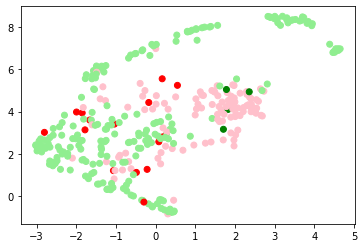

In [108]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
%matplotlib inline

umap_reducer = umap.UMAP()
X = data[range(0, 34)]
y_pred = classifier.predict(X)
y_act = data[34]
y_act.name = "act"
Y = pandas.concat([y_act, pandas.Series(y_pred, name="pred")], axis=1)

color_map = {"gg": "lightgreen", "bb": "pink", "gb": "green", "bg": "red"}
colors = Y.apply(lambda x: x['act'] + x['pred'], axis=1).map(color_map)


_data = X.values

scaled_data = RobustScaler().fit_transform(_data)
embedding_data = umap_reducer.fit_transform(scaled_data)

plt.scatter(embedding_data[:, 0], embedding_data[:, 1], c=colors)
